In [32]:
L = [1,2,3,4,5]
L[:-1]

[1, 2, 3, 4]

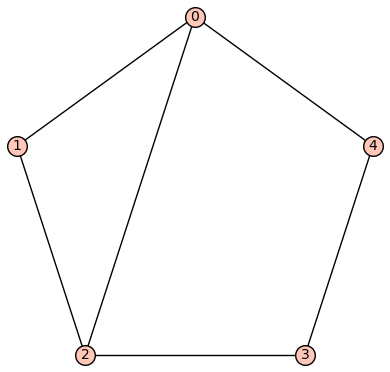

In [33]:
#creating parallel connection of cycles
m, n = 3, 4
R = PolynomialRing(QQ, 'q')
q = R.gen(0)

def parallel_connection(m, n):
    G = graphs.CycleGraph(m + n - 2)
    G.add_edge(0, m-1)
    edge_e = frozenset({(0, m - 1)})
    G.show()
    return Matroid(G), edge_e

def kl(M):
    return M.lattice_of_flats().kazhdan_lusztig_polynomial()

M = parallel_connection(m, n)
edge_e = frozenset({(0, m - 1)})

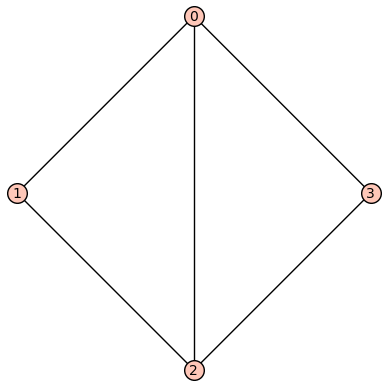

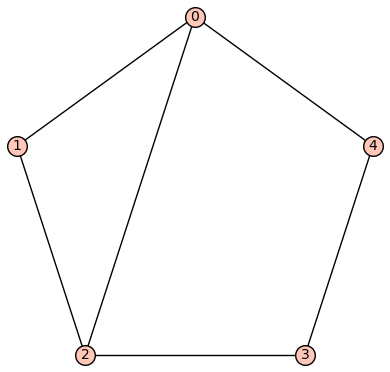

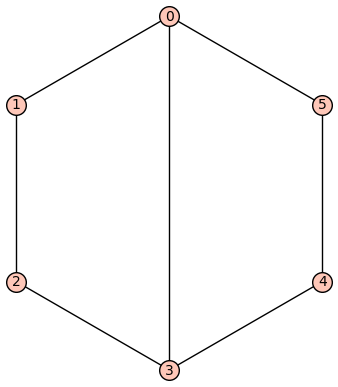

[(Graphic matroid of rank 3 on 5 elements, frozenset({(0, 2)})), (Graphic matroid of rank 4 on 6 elements, frozenset({(0, 2)})), (Graphic matroid of rank 5 on 7 elements, frozenset({(0, 3)}))]


Matroid               KL lhs rhs
0  (Graphic matroid of rank 3 on 5 elements, ((0,...            q + 1  -q  -q
1  (Graphic matroid of rank 4 on 6 elements, ((0,...          4*q + 1  -q  -q
2  (Graphic matroid of rank 5 on 7 elements, ((0,...  5*q^2 + 8*q + 1  -q  -q

In [34]:
# Create a list of matroids
tups = [(m, n) for m in range(3, 5) for n in range(m, 5)]
matroids_list = [parallel_connection(m, n) for m, n in tups]
print(matroids_list)

# Create a dataframe to store the results
import pandas as pd

data = {
    'Matroid': matroids_list,
    'KL': [kl(m) for (m, e) in matroids_list],
    'lhs': [kl(m) - kl(m.delete(e)) for (m, e) in matroids_list],
    'rhs': [-q * kl(m.contract(e)) for (m, e) in matroids_list],
}

df = pd.DataFrame(data)
display(df)

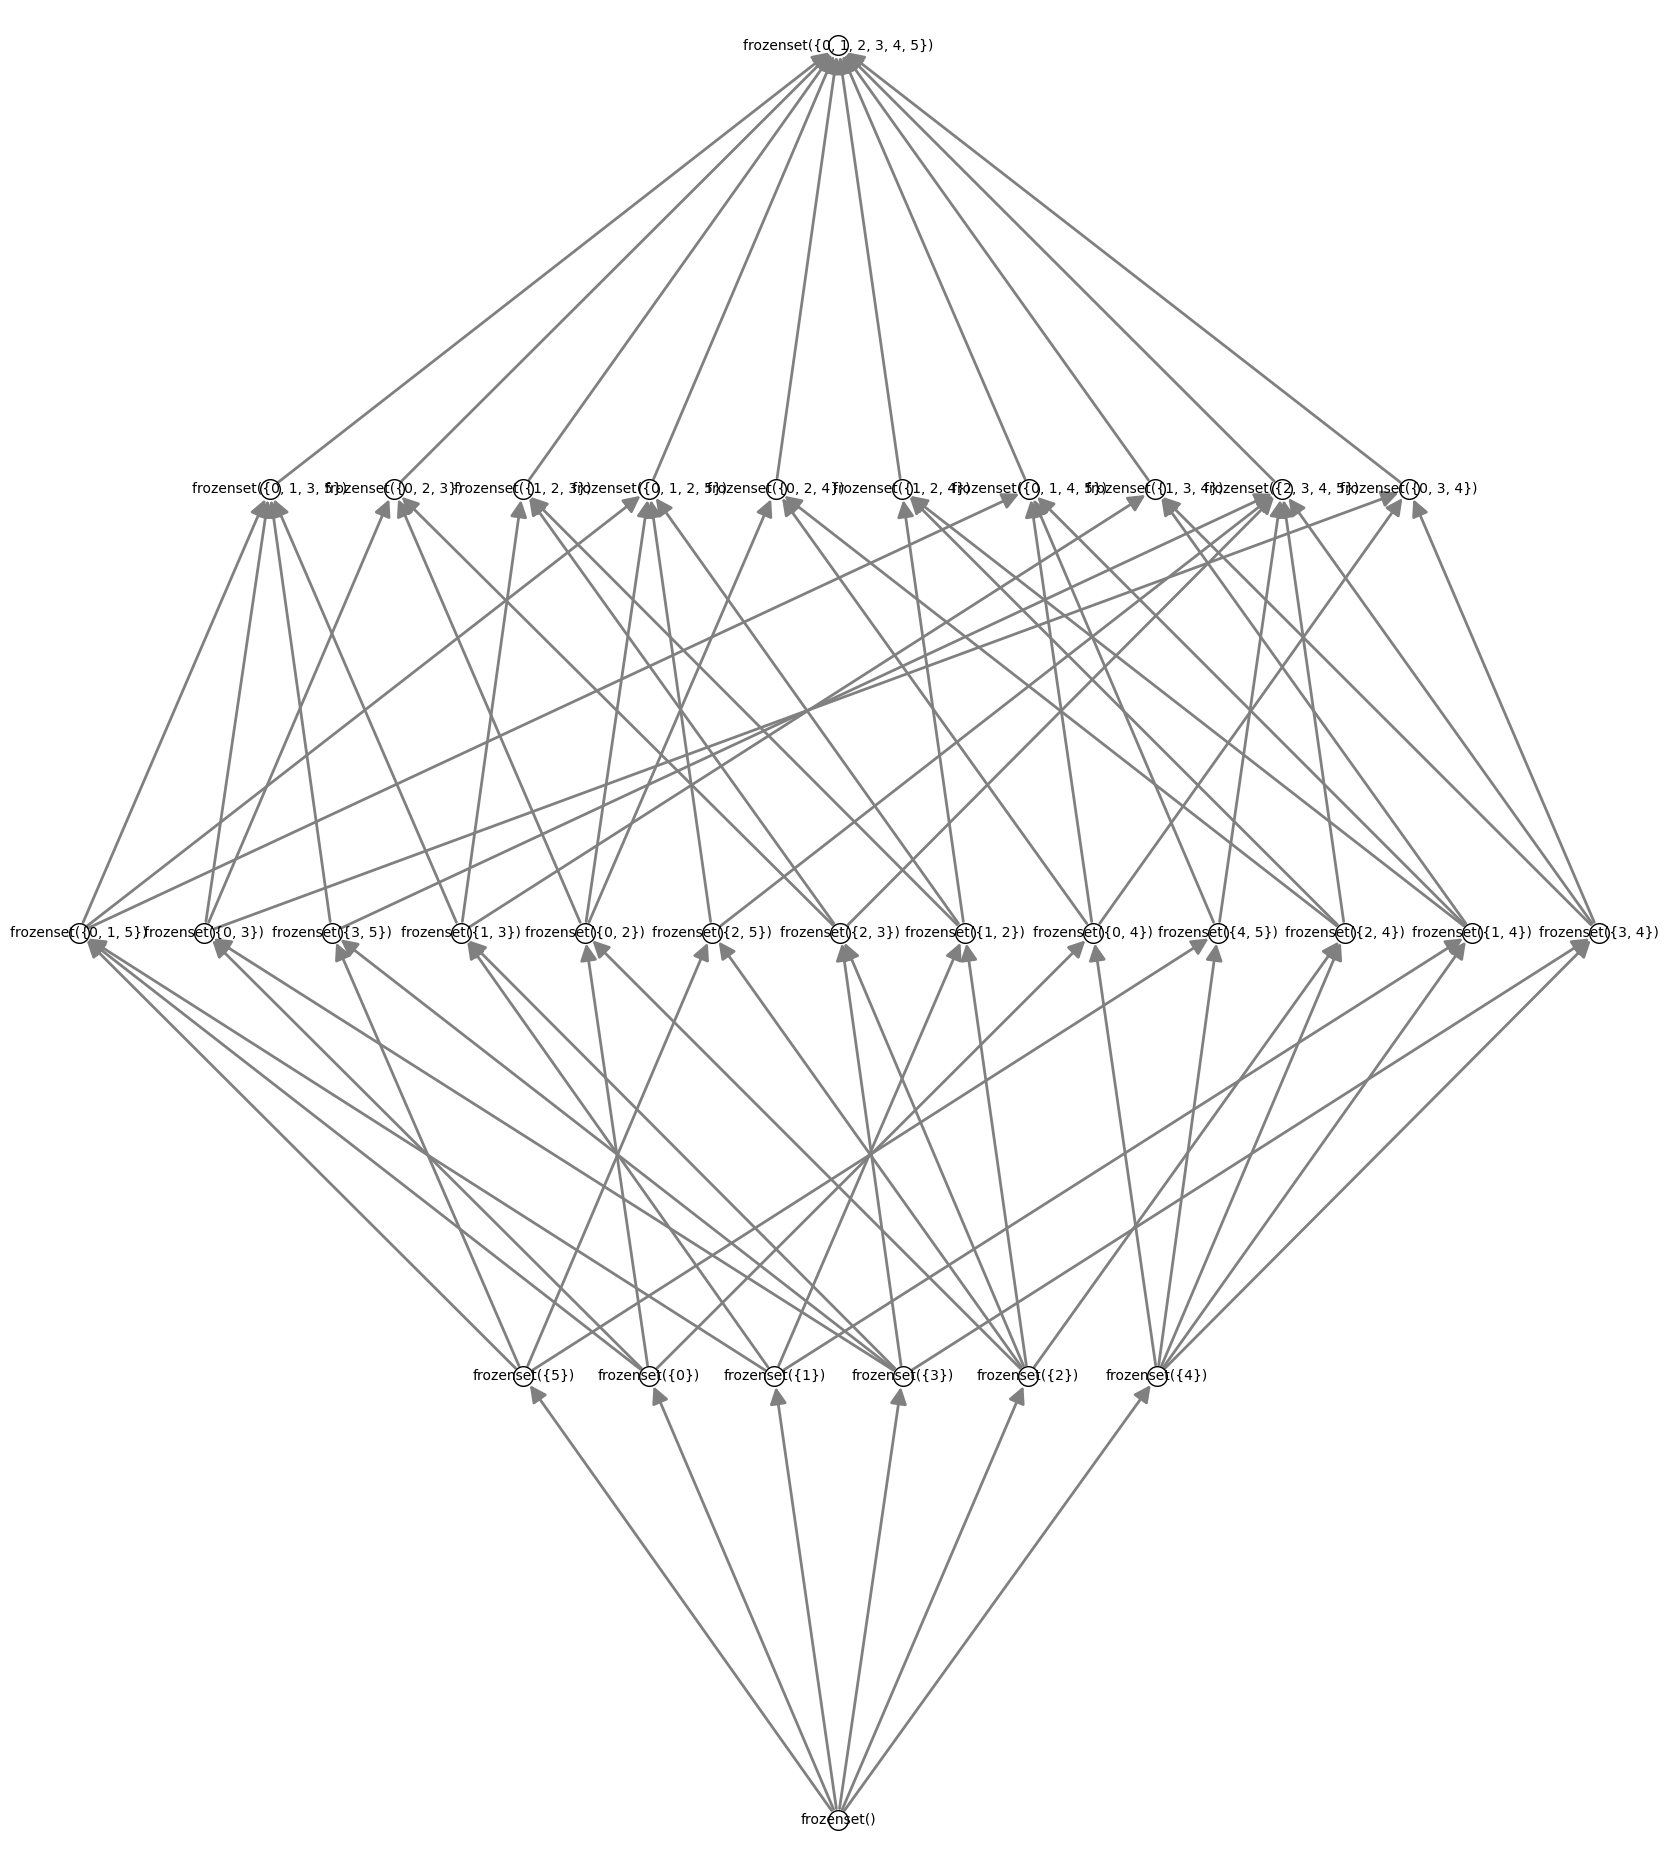

In [58]:
#plottting the geometric lattice:
#size = 0 for now

def plotmatroid(m):
    flats = m.lattice_of_flats().list()
    gset = m.groundset()
    labels = {element: idx for idx, element in enumerate(gset)}
    relabel_flats = {flat: frozenset({labels[element] for element in flat}) for flat in flats}
    return m.lattice_of_flats().plot(
        element_labels = relabel_flats, element_color = "white",
        figsize= 25, cover_color = "grey")

plotmatroid(matroids_list[1][0])


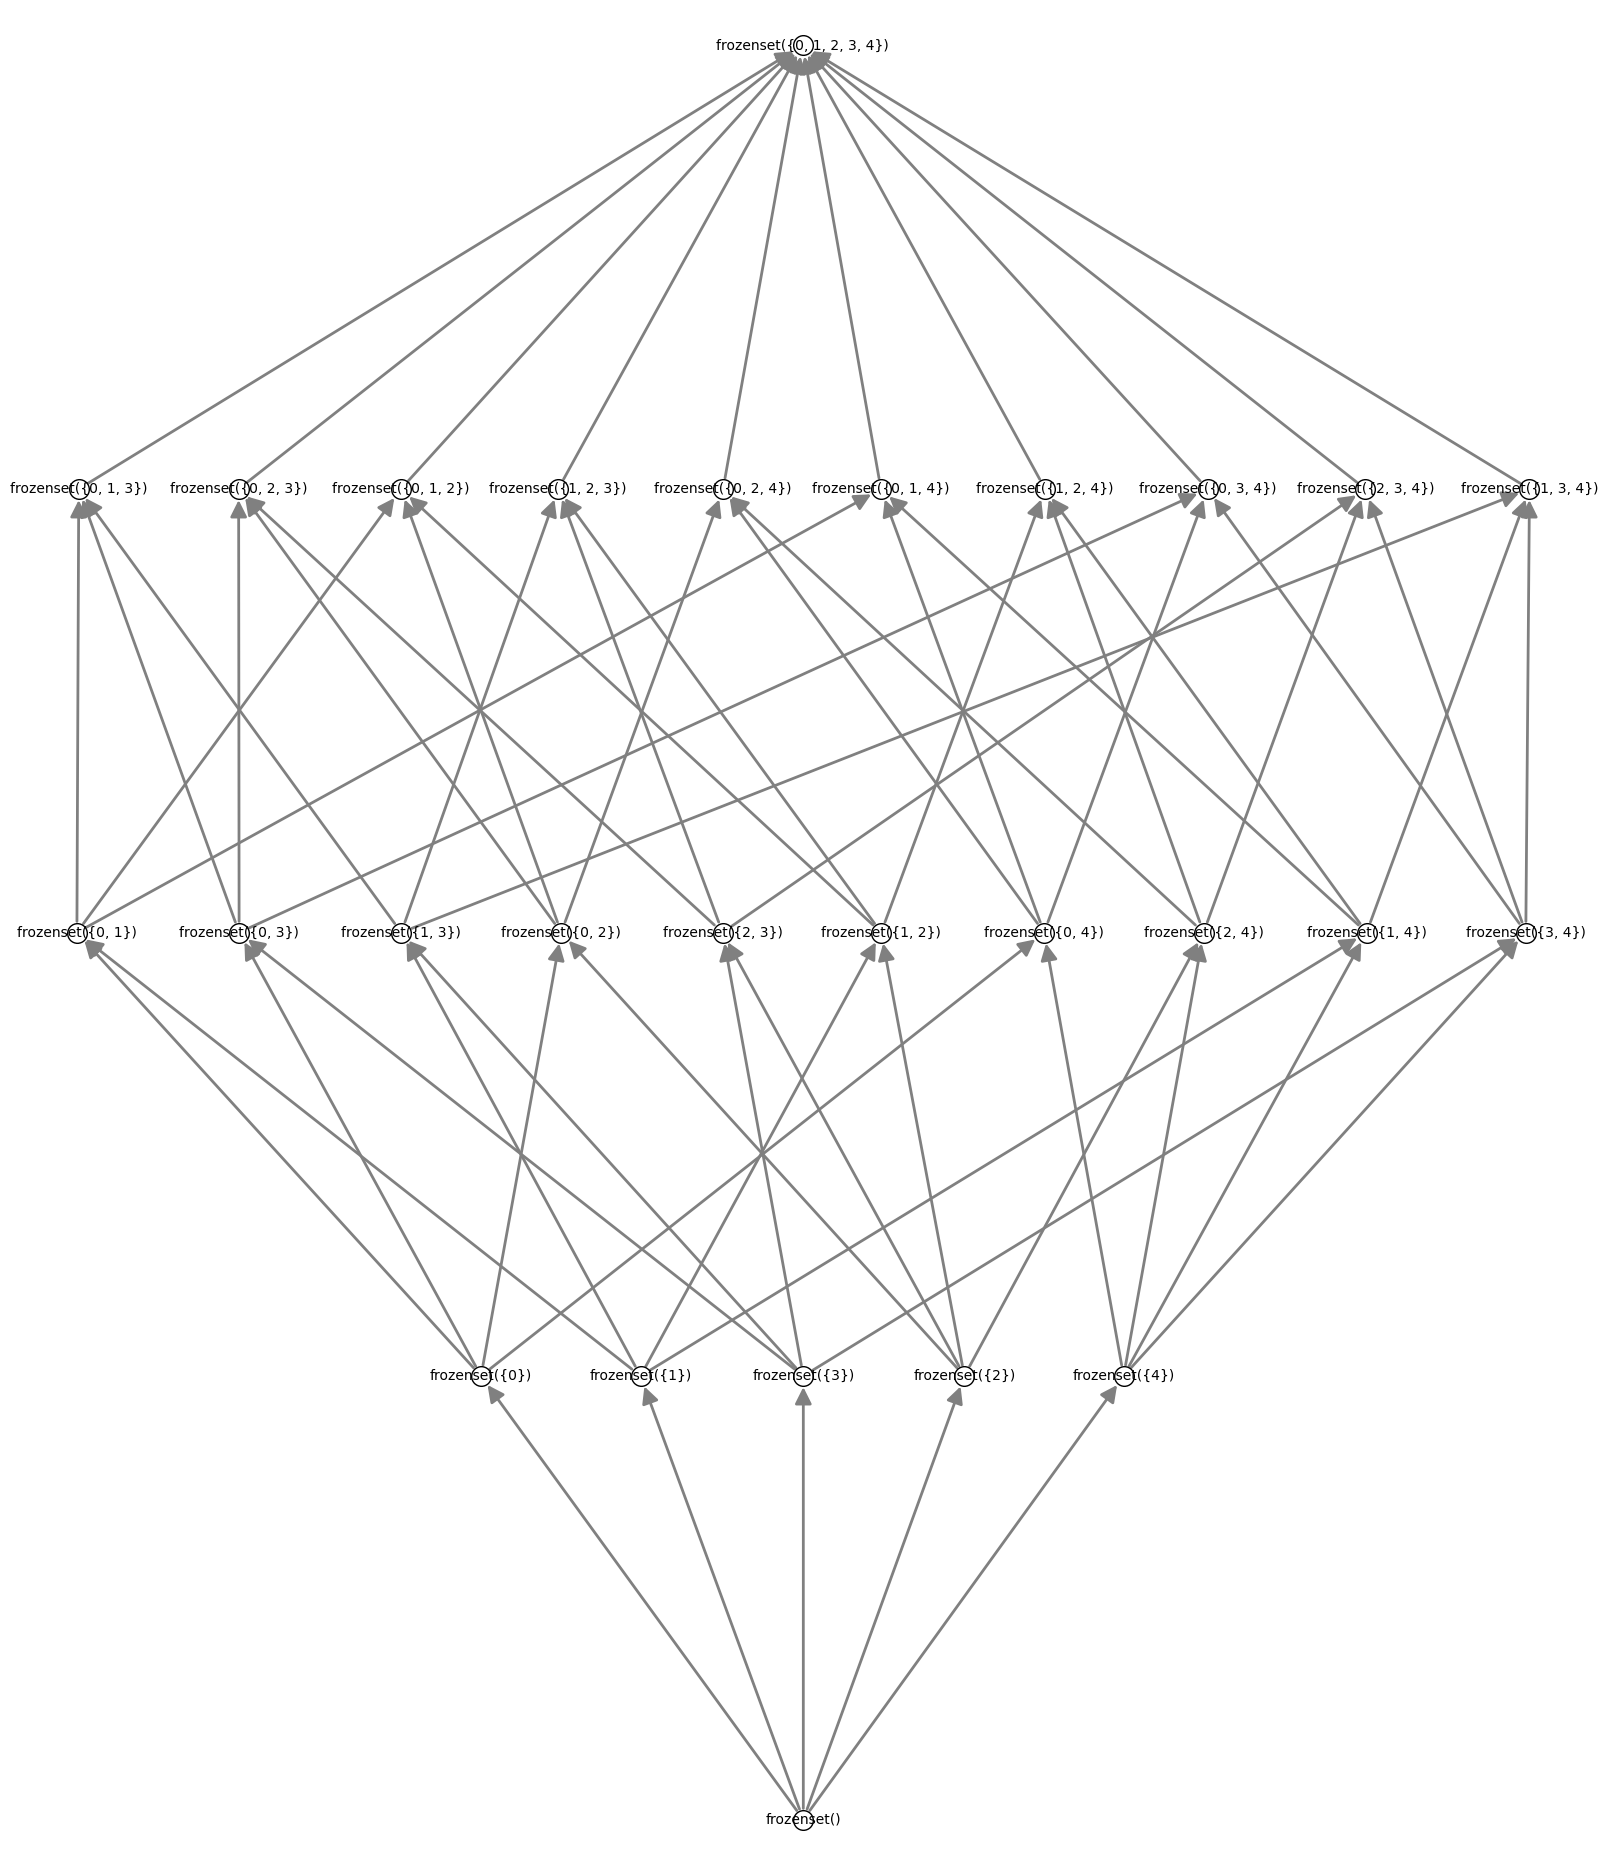

In [46]:
plotmatroid(matroids_list[1][0].delete(matroids_list[1][1]))

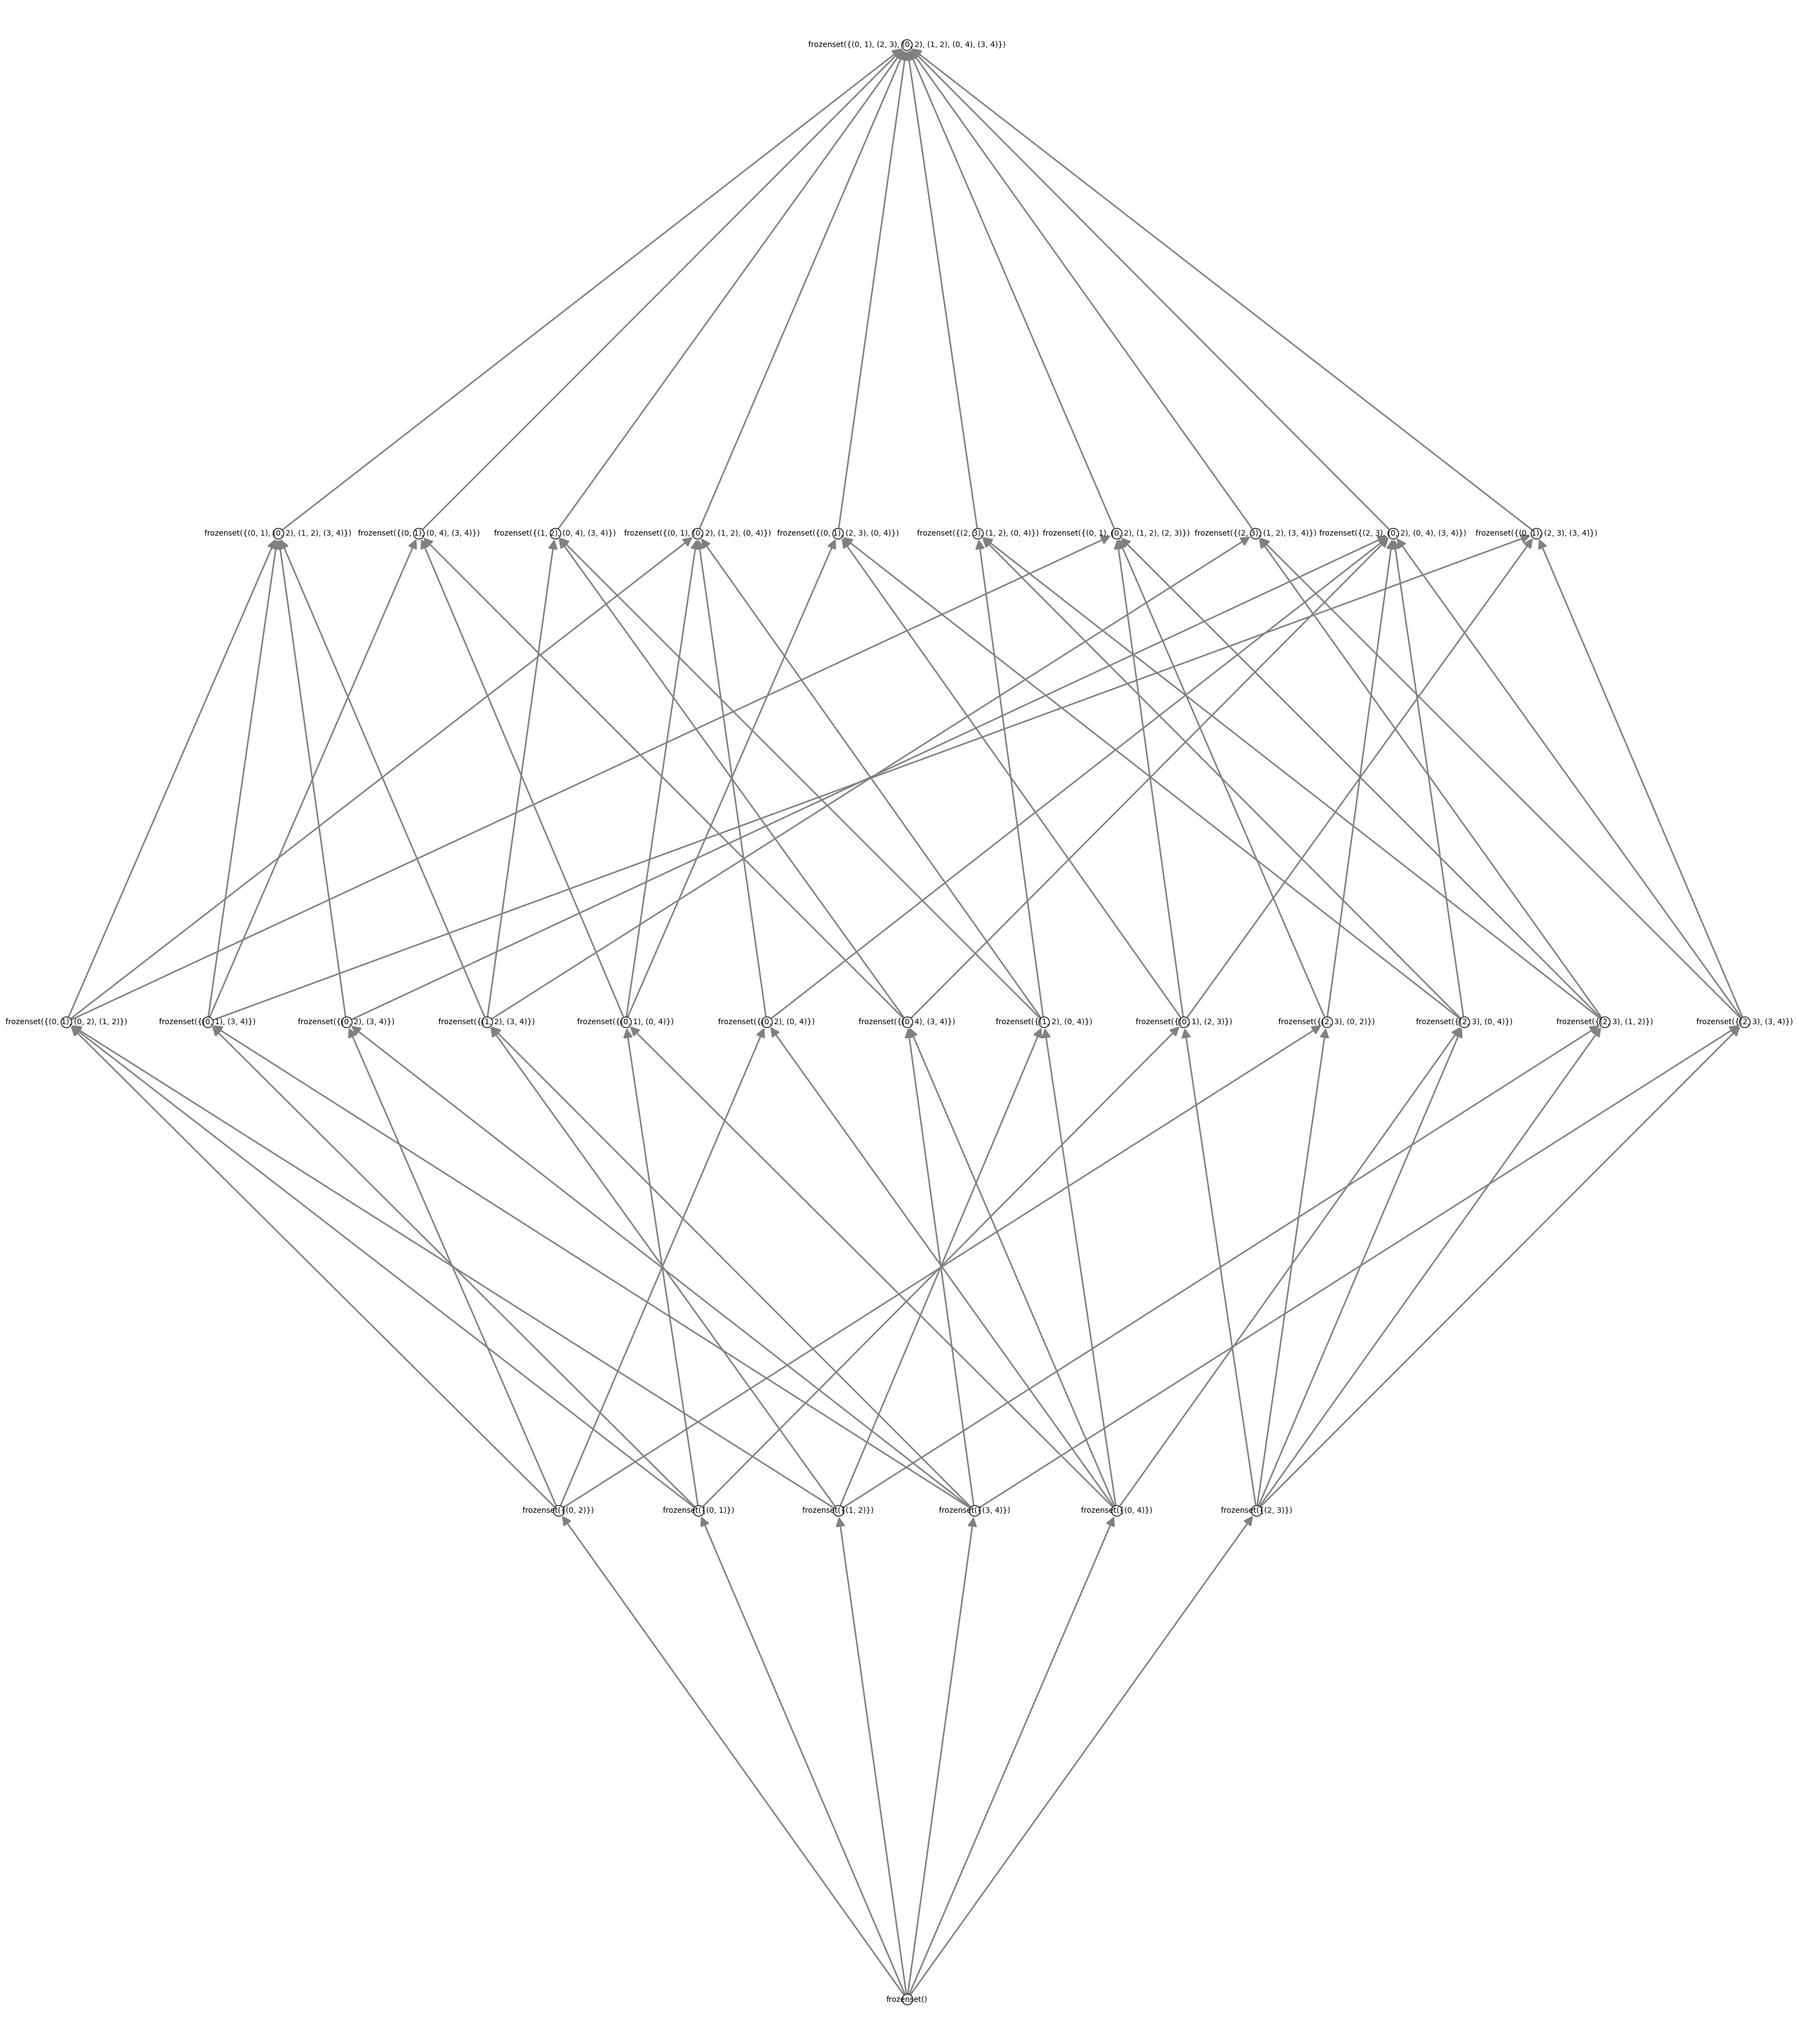

In [54]:
matroids_list[1][0].lattice_of_flats().plot(
        element_color = "white",
        figsize= 50, cover_color = "grey")

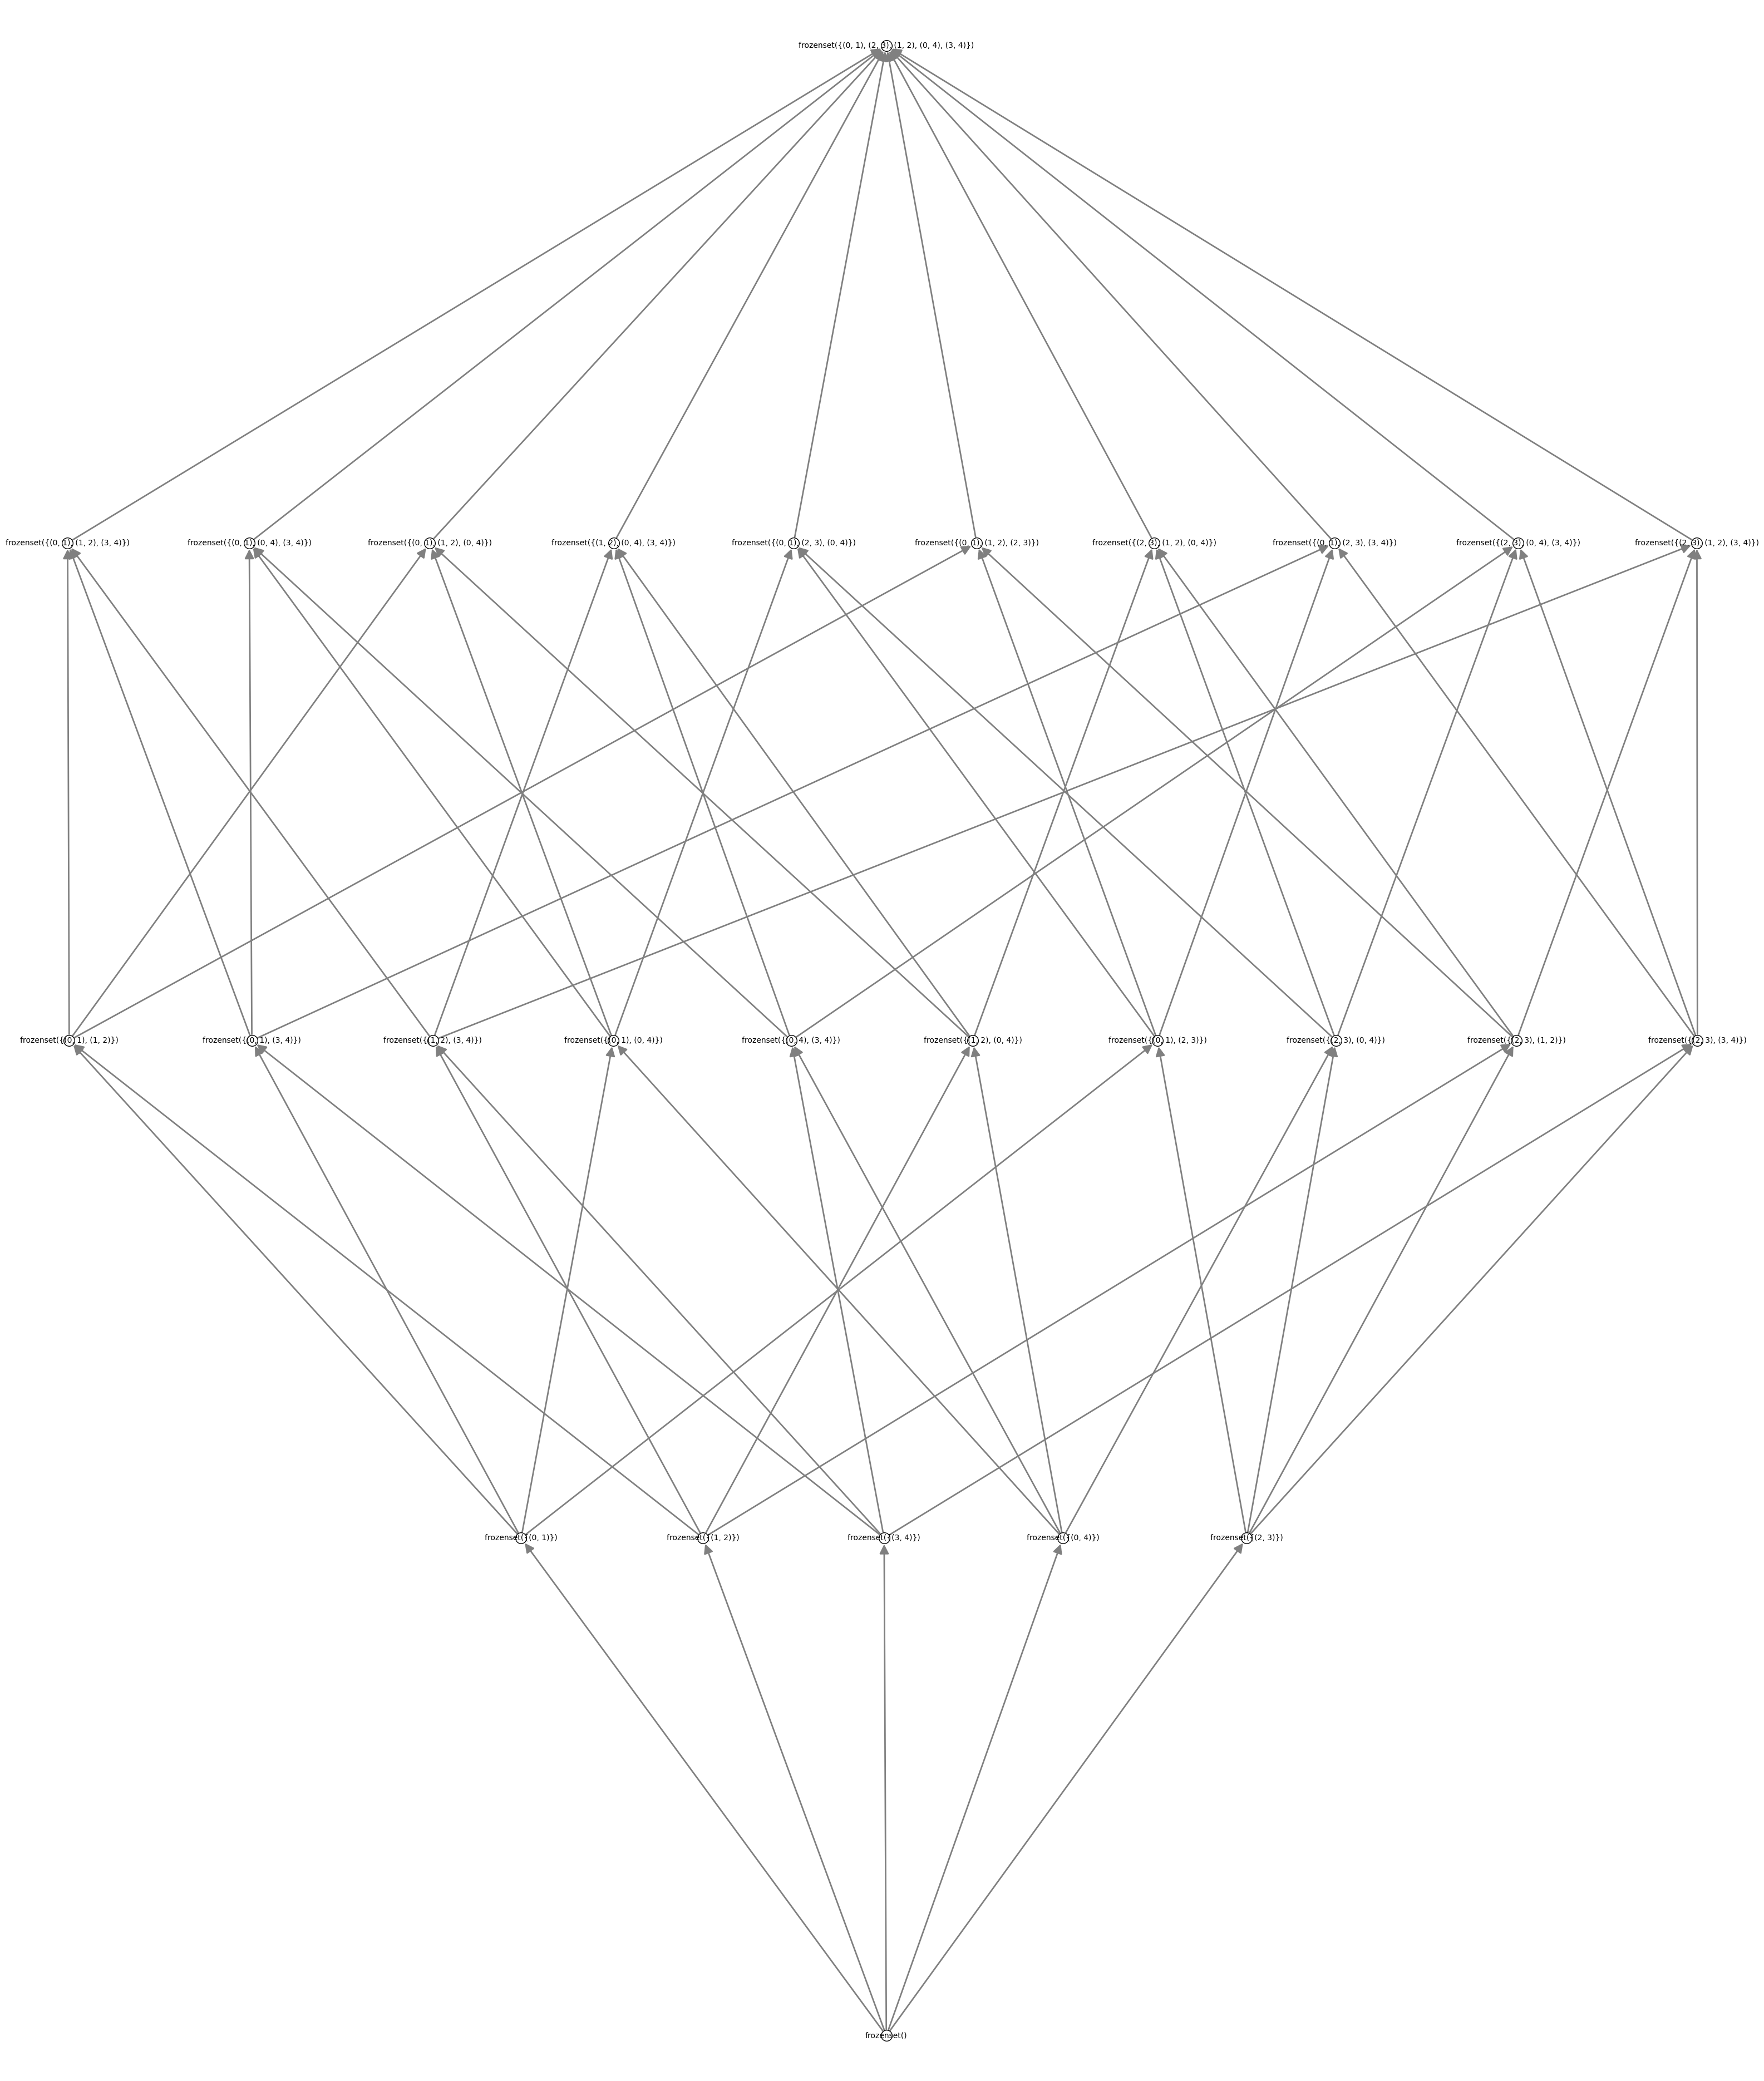

In [53]:
matroids_list[1][0].delete(matroids_list[1][1]).lattice_of_flats().plot(
        element_color = "white",
        figsize= 50, cover_color = "grey")